# Major Leagues

#### Submitted By: Arman Ghasemi KU ID: 2970754 Email: arman.ghasemi@ku.edu

In this project datasets related to the soccer has been chosen and the goal is to apply some feature engineering and also to some regression models to predict the score of each team.

#### Data Source : https://github.com/fivethirtyeight/data/tree/master/soccer-spi

### Importing Libraries

First of all useful library should be imported.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statistics import mean
from sklearn.ensemble import RandomForestRegressor

#### Reading datasets

In [2]:
DF = pd.read_csv('https://raw.githubusercontent.com/armangh67/Major-Leagues/master/datasets/spi_matches.csv', low_memory = False)

In [3]:
DF.head()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,...,32.4,67.7,0.0,1.0,0.97,0.63,0.43,0.45,0.00,1.05
1,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,...,53.7,22.9,2.0,2.0,2.45,0.77,1.75,0.42,2.10,2.10
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
3,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
4,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05


To understand the dataset better, the info has been shown as below.

In [4]:
print(DF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32278 entries, 0 to 32277
Data columns (total 22 columns):
date           32278 non-null object
league_id      32278 non-null int64
league         32278 non-null object
team1          32278 non-null object
team2          32278 non-null object
spi1           32278 non-null float64
spi2           32278 non-null float64
prob1          32278 non-null float64
prob2          32278 non-null float64
probtie        32278 non-null float64
proj_score1    32278 non-null float64
proj_score2    32278 non-null float64
importance1    23161 non-null float64
importance2    23161 non-null float64
score1         27373 non-null float64
score2         27373 non-null float64
xg1            14974 non-null float64
xg2            14974 non-null float64
nsxg1          14974 non-null float64
nsxg2          14974 non-null float64
adj_score1     14974 non-null float64
adj_score2     14974 non-null float64
dtypes: float64(17), int64(1), object(4)
memory usage: 5.4+ M

## Feature Engineering

### Teams with highest score

We can easily find the teams which score the highest goals in the dataset with the approach given below.

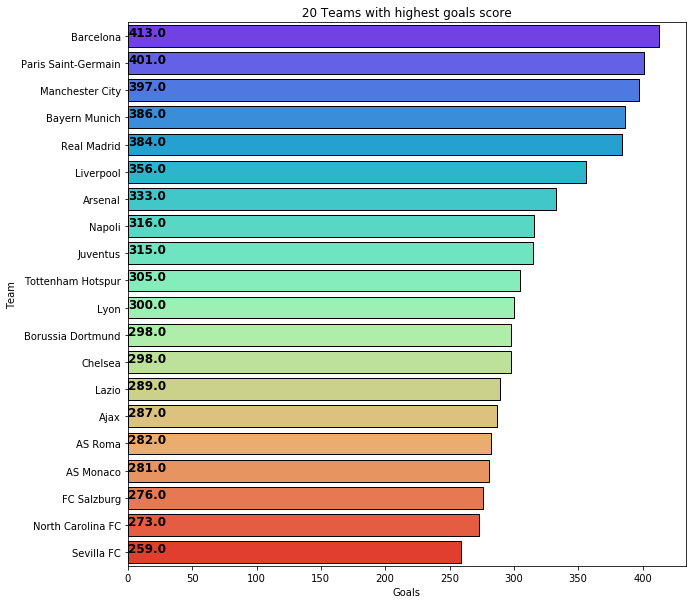

In [5]:
Home_Team = DF.groupby("team1")["score1"].sum().reset_index()
Away_Team = DF.groupby("team2")["score2"].sum().reset_index()
Home_Team = Home_Team.sort_values(by="team1",ascending= False)
Away_Team = Away_Team.sort_values(by="team2",ascending= False)
HT = Home_Team
HT = HT.rename(columns={'team1':"Team", 'score1':"Goals"})
AT = Away_Team
AT = AT.rename(columns={'team2':"Team", 'score2':"Goals"})
Goals = pd.concat([HT,AT])
Goals = Goals.groupby("Team")["Goals"].sum().reset_index().sort_values(by = "Goals",ascending = False)
plt.figure(figsize=(10,10))
ax = sns.barplot(x="Goals",y="Team",
                  data=Goals[:20],palette="rainbow",
                 linewidth = 1,edgecolor = "k"*20)
for i,j in enumerate(Goals["Goals"][:20]):
    ax.text(.3,i,j,weight="bold",color = "k",fontsize =12)
plt.title(" 20 Teams with highest goals score ")
plt.show()

## Cleaning the Datasets

All the missing data in the dataset should be removed.

In [6]:
DF_new =DF.dropna(how = 'any')

In [7]:
DF_new.isnull().sum()

date           0
league_id      0
league         0
team1          0
team2          0
spi1           0
spi2           0
prob1          0
prob2          0
probtie        0
proj_score1    0
proj_score2    0
importance1    0
importance2    0
score1         0
score2         0
xg1            0
xg2            0
nsxg1          0
nsxg2          0
adj_score1     0
adj_score2     0
dtype: int64

In [8]:
DF_new.shape

(13152, 22)

### Correlation Map

To see the correlation between the attributes we can plot the correlation map among all features.

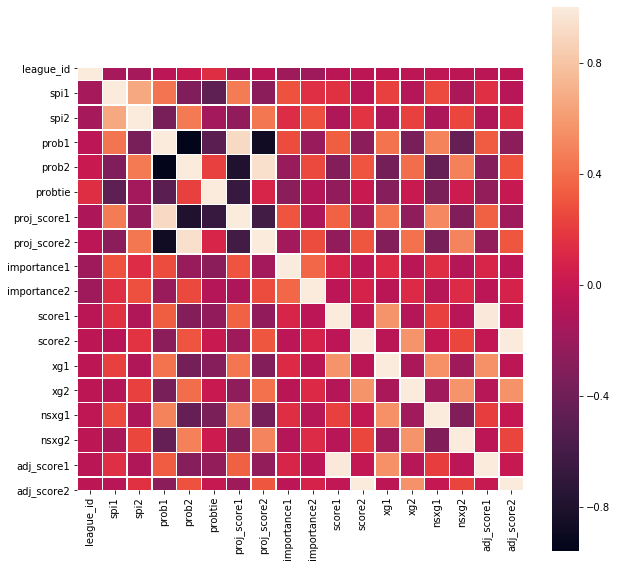

In [9]:
fig, ax = plt.subplots(figsize=(14,12)) 
cor = DF_new.corr()
sns.heatmap(cor, square = True, linewidths=0.1, annot=True, ax=ax)

It is obviously can be seen that the features such as prob1&prob2, prob1&proj_score2 and prob2&proj_score1 have the highest correlation.

## Regression Models

### Linear Regression

Now we want to build a model with Linear Regression to predict the Score1.

In [10]:
X = DF_new[['spi1','spi2','prob1', 'prob2' , 'probtie' , 'adj_score1' , 'adj_score2'  , 'xg1' , 'xg2' , 'nsxg1', 'nsxg2' ]].values
Y = DF_new['score1'].values
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.3)
LR = LinearRegression()
LR.fit(xTrain, yTrain)
yPrediction = LR.predict(xTest)

In [12]:
Prediction_Table = pd.DataFrame ({'Score1 actual value':yTest , 'Score1 prediction': yPrediction})
print(Prediction_Table)

      Score1 actual value  Score1 prediction
0                     1.0           1.144254
1                     2.0           2.202857
2                     2.0           2.083440
3                     1.0           1.070178
4                     2.0           2.121817
...                   ...                ...
3941                  1.0           1.046599
3942                  2.0           2.118045
3943                  4.0           4.205045
3944                  3.0           3.103134
3945                  2.0           2.122095

[3946 rows x 2 columns]


To see the propose model errors:

In [16]:
errors = list()
n = 0
for row in yTest:
    errors.append(yPrediction[n]-row)
    n = n + 1    
print("The Max value of errors is", max(errors), "\nAnd the Min value of errors is",min(errors))
print("Average value of errors is", mean(errors))

The Max value of errors is 2.0604803144476627 
And the Min value of errors is -1.5705825232775688
Average value of errors is 0.0019314961552552717


## Random Forest

Here we want to build a model with Random Forest to predict the Score2.

In [28]:
X = DF_new[['spi1','spi2','prob1', 'prob2' , 'probtie' , 'adj_score1' , 'adj_score2'  , 'xg1' , 'xg2' , 'nsxg1', 'nsxg2' ]].values
Y = DF_new['score2'].values
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.3)
RF = RandomForestRegressor(n_estimators=2000, max_features=11)
RF.fit(xTrain, yTrain)
yPrediction = RF.predict(xTest)

In [33]:
Prediction_Table = pd.DataFrame ({'Score2 actual value':yTest , 'Score2 prediction': yPrediction})
print(Prediction_Table)

      Score2 actual value  Score2 prediction
0                     1.0                1.0
1                     0.0                0.0
2                     1.0                1.0
3                     0.0                0.0
4                     1.0                1.0
...                   ...                ...
3941                  1.0                1.0
3942                  1.0                1.0
3943                  3.0                3.0
3944                  3.0                3.0
3945                  1.0                1.0

[3946 rows x 2 columns]


To see the propose model errors:

In [34]:
errors = list()
n = 0
for row in yTest:
    errors.append(yPrediction[n]-row)
    n = n + 1   
print("The Max value of errors is", max(errors), "\nAnd the Min value of errors is",min(errors))
print("Average value of errors is", mean(errors))

The Max value of errors is 1.146 
And the Min value of errors is -1.0
Average value of errors is 0.0014872022301064373


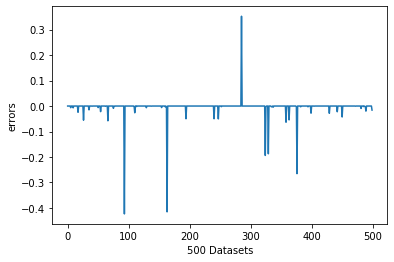

In [37]:
df = Prediction_Table.head(500)
error = df['Score2 actual value'] - df['Score2 prediction']
plt.plot(error)
plt.ylabel('errors')
plt.xlabel('500 Datasets')
plt.show()

## Conclusion

In conclusion, two Regression models are applied to this dataset and they were really effective to predict scores as it can be seen above. To compare these two methods it seems that Random Forest is more accurate than Linear Regression.